In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movie_metadata.csv")

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

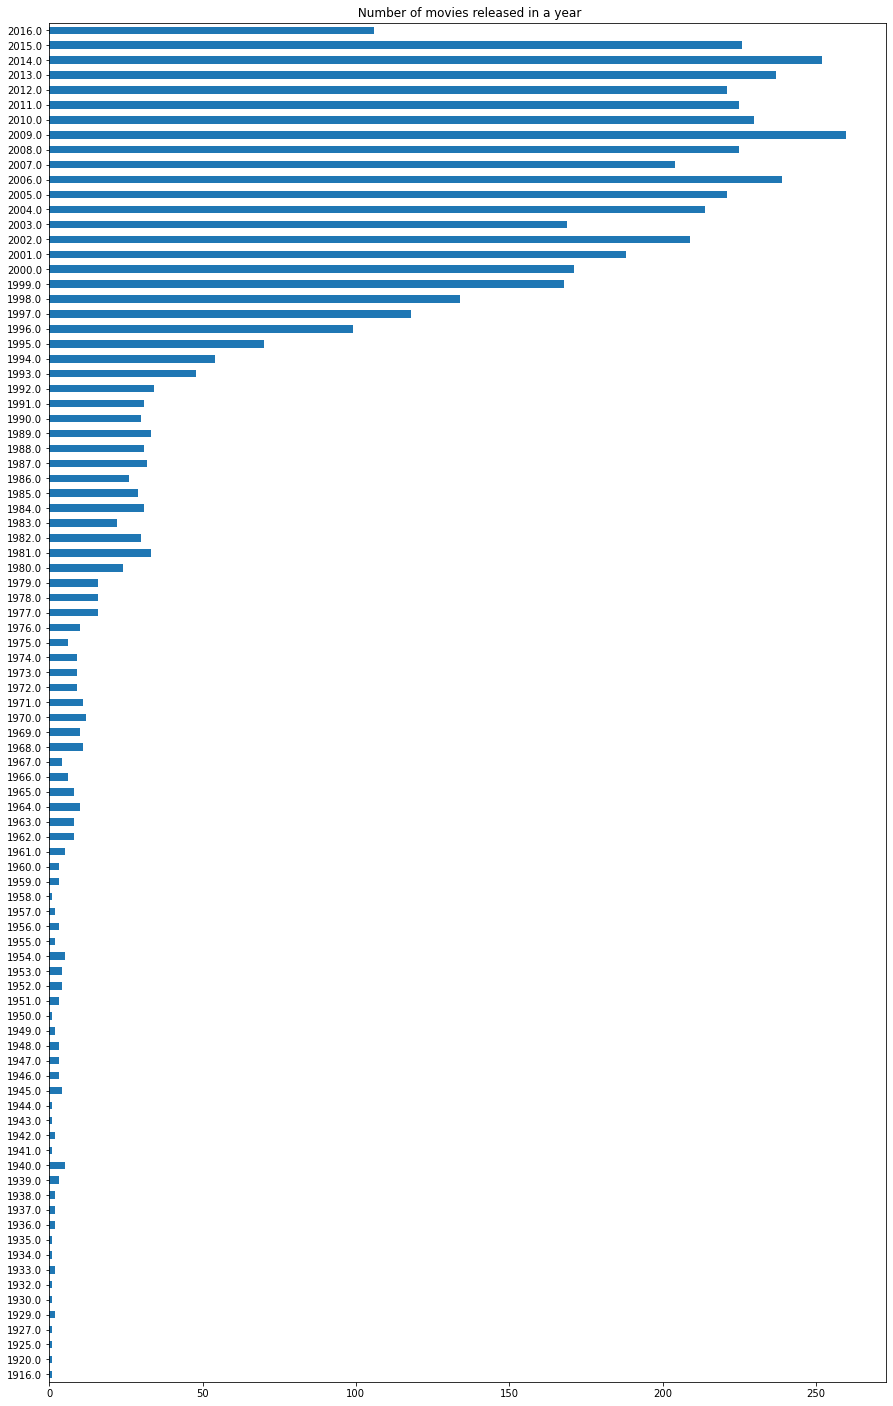

In [5]:
df.title_year.value_counts().sort_index().plot(kind='barh',figsize = (15,25))
plt.title(" Number of movies released in a year")
plt.show()

In [6]:
(df.movie_title == 'Toy Story\xa0').sum()

1

In [7]:
df.loc[df.movie_title == 'Toy Story\xa0',['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
1588,John Lasseter,Tom Hanks,John Ratzenberger,Jim Varney,Adventure|Animation|Comedy|Family|Fantasy,Toy Story


In [8]:
df = df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [9]:
df.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [10]:
df.isnull().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [11]:
df['director_name'] = df['director_name'].replace(np.nan,'unknown')
df['actor_1_name'] = df['actor_1_name'].replace(np.nan,'unknown')
df['actor_2_name'] = df['actor_2_name'].replace(np.nan,'unknown')
df['actor_3_name'] = df['actor_3_name'].replace(np.nan,'unknown')

In [12]:
df['genres'] = df['genres'].replace('|'," ")

In [14]:
df["movie_title"] = df["movie_title"].str.lower()

In [15]:
df["movie_title"][1]

"pirates of the caribbean: at world's end\xa0"

In [16]:
df["movie_title"] = df["movie_title"].apply(lambda x : x[:-1])

In [17]:
df["movie_title"][1]

"pirates of the caribbean: at world's end"

In [18]:
df.to_csv("data_.csv",index = False)